# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Path file CSV
file_path = '/content/drive/My Drive/machine learning doing/netflix_titles.csv'

# Baca hanya 5000 baris pertama dari file CSV
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama untuk memastikan data terbaca dengan benar
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.head(10)
# df.describe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

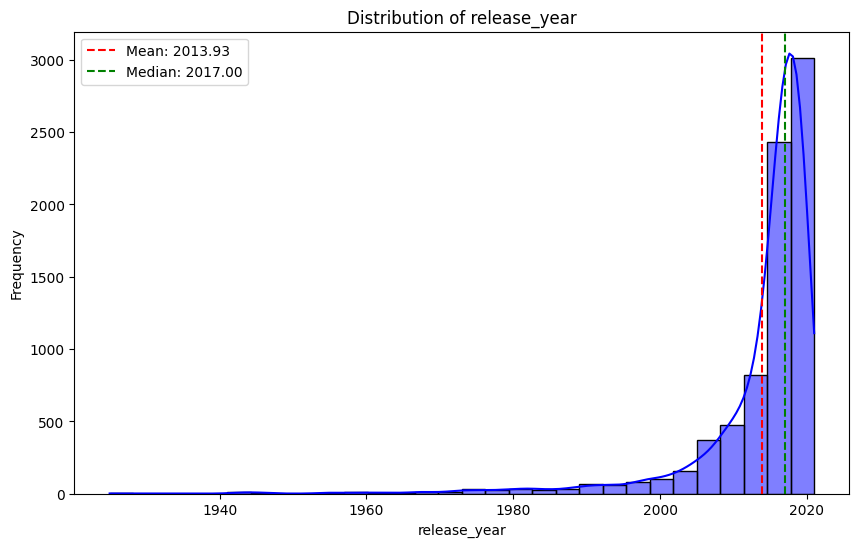

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang tersedia di dataset Anda adalah 'release_year'
column_name = 'release_year'

# Visualisasi distribusi kolom release_year
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], kde=True, color="blue", bins=30)

# Menghitung rata-rata dan median
mean_value = df[column_name].mean()
median_value = df[column_name].median()

# Menambahkan garis rata-rata dan median
plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

# Menambahkan judul dan label yang lebih informatif
plt.title(f"Distribution of {column_name}")
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.legend()

# Menampilkan plot
plt.show()


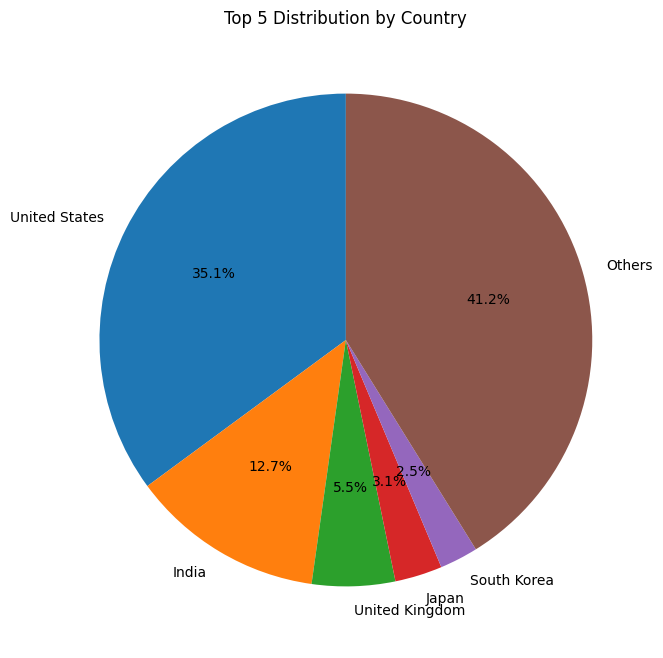

In [8]:
import matplotlib.pyplot as plt

# Mengambil 5 negara teratas dan menggabungkan sisanya menjadi "Others"
top_countries = df['country'].value_counts().nlargest(5)
other_countries = df['country'].value_counts().iloc[5:].sum()
top_countries['Others'] = other_countries

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Distribution by Country')
plt.show()


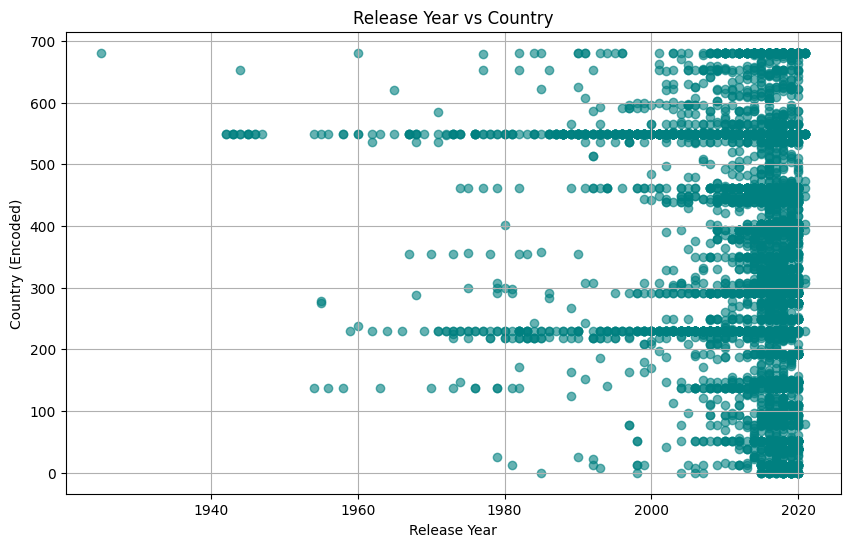

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Mengonversi country ke bentuk numerik untuk visualisasi
le = LabelEncoder()
df['country_encoded'] = le.fit_transform(df['country'])

# Scatter Plot untuk Release Year vs Country
plt.figure(figsize=(10, 6))
plt.scatter(df['release_year'], df['country_encoded'], alpha=0.6, c='teal')
plt.title('Release Year vs Country')
plt.xlabel('Release Year')
plt.ylabel('Country (Encoded)')
plt.grid(True)
plt.show()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   show_id          7787 non-null   object
 1   type             7787 non-null   object
 2   title            7787 non-null   object
 3   director         5398 non-null   object
 4   cast             7069 non-null   object
 5   country          7280 non-null   object
 6   date_added       7777 non-null   object
 7   release_year     7787 non-null   int64 
 8   rating           7780 non-null   object
 9   duration         7787 non-null   object
 10  listed_in        7787 non-null   object
 11  description      7787 non-null   object
 12  country_encoded  7787 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 791.0+ KB


In [11]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

# Pilih hanya kolom numerik dari DataFrame
numerical_data = df.select_dtypes(include=[np.number])

# Terapkan VarianceThreshold pada data numerik
threshold = 0.1  # Sesuaikan nilai threshold
selector = VarianceThreshold(threshold=threshold)
data_high_variance = selector.fit_transform(numerical_data)

# Mendapatkan nama fitur yang tersisa setelah seleksi varians
selected_features = numerical_data.columns[selector.get_support(indices=True)]
print("Fitur dengan varians tinggi:", selected_features)

# Menyusun kembali DataFrame dengan fitur yang dipilih
df_high_variance = df[selected_features]


Fitur dengan varians tinggi: Index(['release_year', 'country_encoded'], dtype='object')


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [12]:
# Menampilkan semua data yang duplikat

df.duplicated().sum()
df.isnull().sum()
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
df.dropna(inplace=True)
print(df)

0
     show_id     type       title           director  \
1         s2    Movie        7:19  Jorge Michel Grau   
2         s3    Movie       23:59       Gilbert Chan   
3         s4    Movie           9        Shane Acker   
4         s5    Movie          21     Robert Luketic   
5         s6  TV Show          46        Serdar Akar   
...      ...      ...         ...                ...   
7778   s7779    Movie  Zombieland    Ruben Fleischer   
7780   s7781    Movie         Zoo       Shlok Sharma   
7781   s7782    Movie        Zoom       Peter Hewitt   
7782   s7783    Movie        Zozo        Josef Fares   
7783   s7784    Movie      Zubaan        Mozez Singh   

                                                   cast  \
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
5     Erdal Beşikçioğlu, Yasem

In [13]:
#Type your code here
df.head()
# df.describe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,country_encoded
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,308
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",379
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",549
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,549
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,448


In [14]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # Encode Gender dengan LabelEncoder
# df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# # One-hot encode untuk Profession
# df = pd.get_dummies(df, columns=['Profession'], drop_first=True)
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'country_encoded'],
      dtype='object')


In [15]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Menyalin data yang relevan dari DataFrame
data = df[['release_year', 'country']].copy()

# Encode kolom kategorikal 'country', 'rating', dan 'listed_in'
data['country'] = LabelEncoder().fit_transform(data['country'])

# Menampilkan data yang telah diproses
data.head()


,release_year,country
1,2016,239
2,2011,296
3,2009,440
4,2008,440
5,2016,357


Jumlah outliers terdeteksi: 405
Indeks outliers: {7, 2059, 2097, 6198, 6221, 4177, 2135, 94, 6245, 2150, 2152, 105, 6253, 4207, 6255, 6256, 2163, 4211, 4213, 4218, 6266, 2197, 2200, 153, 4259, 2212, 165, 166, 4274, 2228, 6327, 2233, 6329, 4284, 6337, 2251, 4300, 210, 6355, 6357, 6360, 6361, 6363, 4320, 2275, 232, 238, 2290, 267, 273, 6419, 4372, 4395, 4398, 308, 343, 2393, 6489, 6499, 2407, 2410, 381, 382, 391, 392, 4490, 6544, 408, 6552, 6556, 2463, 2465, 2476, 2493, 446, 4542, 455, 6605, 466, 4563, 6613, 473, 2522, 480, 6626, 6627, 485, 486, 487, 488, 4583, 490, 6642, 6644, 2550, 6648, 507, 4617, 4635, 2588, 2589, 4645, 6697, 6698, 6705, 2622, 4675, 6726, 6728, 592, 2643, 6744, 6745, 4701, 2670, 623, 626, 627, 2692, 4743, 2703, 6800, 2707, 4757, 4773, 6828, 4781, 687, 4786, 6839, 4794, 6845, 6850, 708, 4812, 717, 6868, 4844, 4845, 6893, 2799, 756, 757, 758, 770, 773, 4870, 6920, 2827, 6923, 781, 4879, 4882, 2839, 2841, 794, 795, 2847, 6944, 2853, 2859, 2860, 4909, 822, 836, 6990, 700

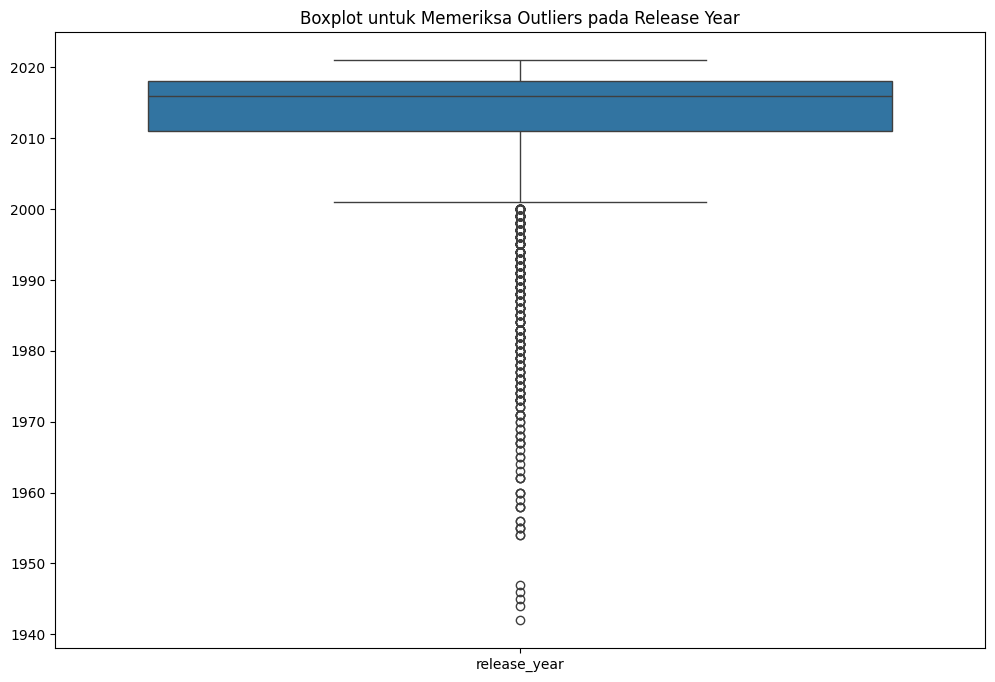

Jumlah data setelah penghapusan outliers: 4403


,release_year,country
1,2016,239
2,2011,296
3,2009,440
4,2008,440
5,2016,357


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Pilih kolom yang relevan untuk analisis (kolom numerik dan kategorikal)
# Menggunakan release_year sebagai kolom numerik dan country sebagai kolom kategorikal
data = df[['release_year', 'country']].copy()

# Encode kolom kategorikal 'country'
data['country'] = LabelEncoder().fit_transform(data['country'])

# Fungsi untuk mengidentifikasi outliers menggunakan IQR
def detect_outliers_iqr(df):
    outlier_indices = []
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Indeks dari outliers
        outlier_indices.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)

    # Mengembalikan indeks unik dari outliers
    return set(outlier_indices)

# Mendapatkan indeks outliers
outliers = detect_outliers_iqr(data)
print(f"Jumlah outliers terdeteksi: {len(outliers)}")
print(f"Indeks outliers: {outliers}")

# Menampilkan boxplot untuk fitur numerik (release_year)
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['release_year']])
plt.title('Boxplot untuk Memeriksa Outliers pada Release Year')
plt.show()
# Menghapus outliers berdasarkan indeks yang terdeteksi
data_cleaned = data.drop(index=outliers)

# Tampilkan jumlah data setelah penghapusan
print(f"Jumlah data setelah penghapusan outliers: {data_cleaned.shape[0]}")

data.head()

In [17]:
data_cleaned = data_cleaned.dropna()
data_cleaned.info()
data_cleaned.duplicated().sum()
data_cleaned.drop_duplicates(inplace=True)
print(data_cleaned.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 4403 entries, 1 to 7783
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   release_year  4403 non-null   int64
 1   country       4403 non-null   int64
dtypes: int64(2)
memory usage: 103.2 KB
0


In [18]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Menyalin data yang relevan dari DataFrame
data_cleaned = df[['release_year', 'country']].copy()

# Encode kolom kategorikal 'country', 'rating', dan 'listed_in'
data_cleaned['country'] = LabelEncoder().fit_transform(data_cleaned['country'])
# Menampilkan data yang telah diproses
data_cleaned.head()
data_cleaned.isnull().sum()


,0
release_year,0
country,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

#Silhouette score without feature selection

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
data_cleaned = data.drop(index=outliers).dropna()
# # Pilih lima fitur dari dataset (termasuk fitur kategorikal dan numerikal)
# data = df[['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']].copy()

# # Encode kolom kategorikal 'Gender'
# data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Lakukan clustering pada dataset yang sudah diencode
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_cleaned)

# Hitung silhouette score
silhouette_avg = silhouette_score(data_cleaned, labels)

print(f"Silhouette score without feature selection: {silhouette_avg}")


Silhouette score without feature selection: 0.6791839824401216


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# # Pilih lima fitur dari dataset (termasuk fitur kategorikal dan numerikal)
# data = df[['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']].copy()

# # Encode kolom kategorikal 'Gender'
# data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# **Feature Selection** menggunakan Variance Threshold
selector = VarianceThreshold(threshold=0.1)  # Misalnya, threshold 0.1
data_selected = selector.fit_transform(data_cleaned)

# Lakukan clustering pada dataset yang sudah dipilih fiturnya
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_selected)

# Hitung silhouette score
silhouette_avg = silhouette_score(data_selected, labels)

print(f"Silhouette score with feature selection: {silhouette_avg}")


Silhouette score with feature selection: 0.6791839824401216


In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd


# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Lakukan clustering menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Anda mungkin perlu menyesuaikan eps dan min_samples
labels_dbscan = dbscan.fit_predict(data_cleaned)

# Hitung silhouette score, mengabaikan noise (-1)
if len(set(labels_dbscan)) > 1:  # Pastikan ada lebih dari satu cluster
    silhouette_avg_dbscan = silhouette_score(data_scaled[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
    print(f"Silhouette score for DBSCAN: {silhouette_avg_dbscan}")
else:
    print("DBSCAN did not find any clusters.")


Silhouette score for DBSCAN: 0.9999999881086665


# **Tuning Jumlah Cluster**
* Mencoba jumlah cluster yang berbeda bisa membantu mendapatkan hasil clustering yang lebih baik. Anda bisa mencoba berbagai nilai n_clusters dan melihat silhouette score yang optimal.

In [26]:
best_score = -1
best_n_clusters = 0

for n_clusters in range(2, 10):  # Uji beberapa nilai cluster
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_cleaned)
    silhouette_avg = silhouette_score(data_cleaned, labels)
    print(f"Silhouette score with {n_clusters} clusters: {silhouette_avg}")

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters

print(f"Best silhouette score is {best_score} with {best_n_clusters} clusters.")


Silhouette score with 2 clusters: 0.7393283163694288
Silhouette score with 3 clusters: 0.6791839824401216
Silhouette score with 4 clusters: 0.7237143642238256
Silhouette score with 5 clusters: 0.7069066507943821
Silhouette score with 6 clusters: 0.755747239728128
Silhouette score with 7 clusters: 0.761565896884573
Silhouette score with 8 clusters: 0.7743006248296417
Silhouette score with 9 clusters: 0.7470037483018419
Best silhouette score is 0.7743006248296417 with 8 clusters.


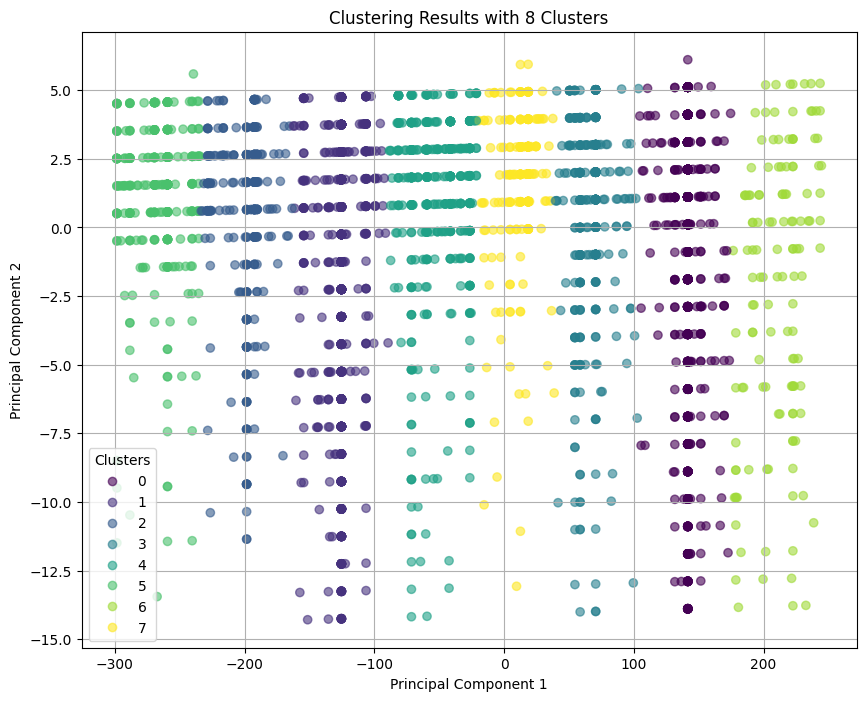

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Tentukan jumlah cluster terbaik
n_clusters = best_n_clusters

# Lakukan clustering dengan jumlah cluster terbaik
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(data_cleaned)

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_cleaned)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', alpha=0.6)

# Buat legenda untuk cluster
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title(f"Clustering Results with {n_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [28]:
from sklearn.feature_selection import SelectKBest, f_classif

# Menggunakan SelectKBest untuk memilih 5 fitur terbaik
selector = SelectKBest(score_func=f_classif, k=5)
data_selected = selector.fit_transform(data_cleaned, labels)  # labels diambil dari hasil clustering sebelumnya

# Clustering setelah SelectKBest
kmeans = KMeans(n_clusters=3, random_state=42)
labels_selected = kmeans.fit_predict(data_selected)
silhouette_avg_selected = silhouette_score(data_selected, labels_selected)

print(f"Silhouette score with SelectKBest: {silhouette_avg_selected}")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=2. All the features will be returned.
  warnings.warn(


Silhouette score with SelectKBest: 0.6791839824401216


Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

#Tujuan Code dibawah ini
Kode ini bertujuan untuk melakukan clustering menggunakan KMeans pada dataset yang telah diproses, mengevaluasi hasilnya menggunakan silhouette score, dan memvisualisasikan kinerja clustering untuk berbagai nilai K. Ini adalah pendekatan yang umum dalam analisis clustering untuk memilih jumlah cluster yang optimal.

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Misalkan 'data' adalah DataFrame Anda yang sudah dibersihkan dan diskalakan.
# Contoh untuk membuat DataFrame (ganti ini dengan dataset Anda)
# data = pd.read_csv('path_to_your_data.csv')  # Ganti dengan path dataset Anda

# 1. Scaling data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Ganti 'data' dengan DataFrame Anda

# 2. Terapkan PCA
pca = PCA(n_components=2)  # Mengurangi menjadi 2 dimensi untuk visualisasi
PCA_ds = pca.fit_transform(data_scaled)

# 3. Lakukan KMeans clustering
best_k = 3  # Misalkan Anda telah menemukan K terbaik adalah 3
kmeans = KMeans(n_clusters=best_k, init='k-means++', n_init=10, max_iter=100, random_state=42)
labels = kmeans.fit_predict(PCA_ds)

# 4. Hitung jumlah data dalam setiap cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()

# 5. Tampilkan hasil
print("Jumlah data dalam setiap cluster:")
print(cluster_counts)


Jumlah data dalam setiap cluster:
0     596
1    2433
2    1779
Name: count, dtype: int64


In [30]:
# Menambahkan label cluster ke DataFrame asli
# data['Cluster'] = km.labels_

# # Menyimpan DataFrame ke file CSV
# data.to_csv('data_with_clusters.csv', index=False)
data.head(5)


,release_year,country
1,2016,239
2,2011,296
3,2009,440
4,2008,440
5,2016,357


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

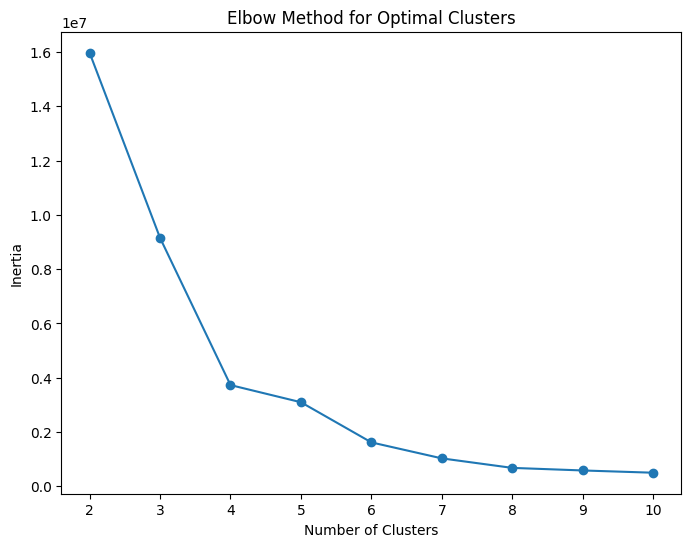

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Tentukan rentang jumlah cluster yang akan diuji
range_clusters = range(2, 11)  # Misalnya dari 2 hingga 10 cluster

# Menyimpan nilai inertia untuk setiap jumlah cluster
inertia_values = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_cleaned)  # Gunakan data_cleaned untuk clustering
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


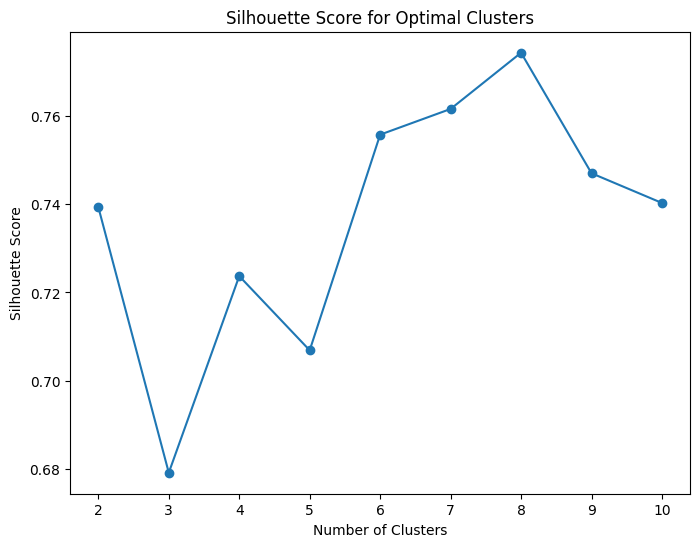

In [44]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Menyimpan nilai Silhouette Score untuk setiap jumlah cluster
silhouette_scores = []

for n_clusters in range(2, 11):  # Uji untuk 2 hingga 10 cluster
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_cleaned)  # Gunakan data_cleaned untuk clustering
    score = silhouette_score(data_cleaned, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


Jumlah cluster yang terbentuk: 1
Jumlah noise (label -1): 0
DBSCAN tidak menemukan cluster yang memadai.


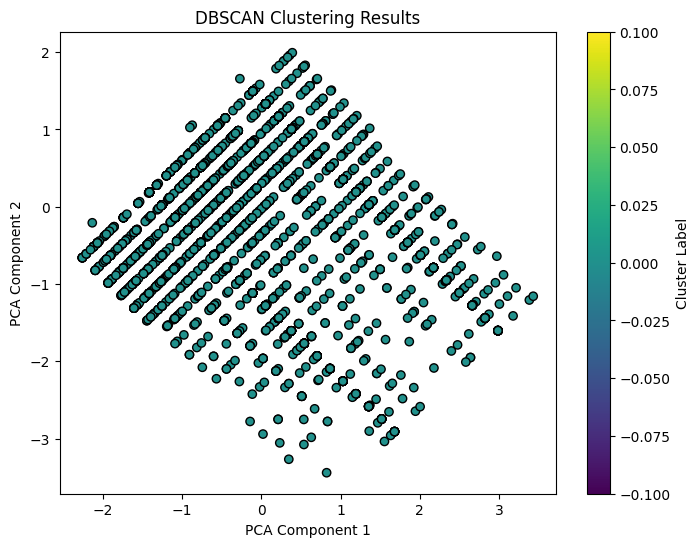

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Lakukan clustering menggunakan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Anda bisa menyesuaikan eps dan min_samples
labels_dbscan = dbscan.fit_predict(data_scaled)

# Cek jumlah cluster dan distribusi label
unique_labels = set(labels_dbscan)
print(f"Jumlah cluster yang terbentuk: {len(unique_labels) - (1 if -1 in unique_labels else 0)}")  # Mengabaikan label -1 (noise)
print(f"Jumlah noise (label -1): {list(labels_dbscan).count(-1)}")

# Hitung silhouette score untuk mengevaluasi kualitas cluster
if len(unique_labels) > 1:  # Pastikan ada lebih dari satu cluster
    silhouette_avg_dbscan = silhouette_score(data_scaled[labels_dbscan != -1], labels_dbscan[labels_dbscan != -1])
    print(f"Silhouette score for DBSCAN: {silhouette_avg_dbscan}")
else:
    print("DBSCAN tidak menemukan cluster yang memadai.")

# Evaluasi visualisasi distribusi cluster (opsional, menggunakan PCA untuk reduksi dimensi jika perlu)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_dbscan, cmap='viridis', marker='o', edgecolor='k')
plt.title("DBSCAN Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()



## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

# Asumsi df adalah DataFrame yang sudah dimuat sebelumnya

# # Pilih beberapa fitur untuk clustering
# data = df[['Age', 'Gender', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']].copy()

# # Encode kolom 'Gender' menggunakan Label Encoding
# data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# # Scaling fitur numerik
# scaler = StandardScaler()
# data[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']] = scaler.fit_transform(data[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size']])

# Clustering tanpa feature selection
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_cleaned)
silhouette_avg = silhouette_score(data_cleaned, labels)
print(f"Silhouette score without feature selection: {silhouette_avg}")

# **Feature selection** menggunakan Variance Threshold
selector = VarianceThreshold(threshold=0.1)  # Threshold yang diatur
data_selected = selector.fit_transform(data)

# Clustering setelah feature selection
kmeans_selected = KMeans(n_clusters=3, random_state=42)
labels_selected = kmeans_selected.fit_predict(data_selected)
silhouette_avg_selected = silhouette_score(data_selected, labels_selected)

print(f"Silhouette score with feature selection: {silhouette_avg_selected}")
data.head()


Silhouette score without feature selection: 0.6791839824401216
Silhouette score with feature selection: 0.698398803986244


,release_year,country
1,2016,239
2,2011,296
3,2009,440
4,2008,440
5,2016,357


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [33]:
from sklearn.cluster import KMeans
from IPython.display import display
# Jalankan KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Tambahkan label cluster ke data
data['Cluster'] = kmeans.labels_

# Tampilkan data dengan label cluster
print(data.head())
display(data)
output_path = '/content/drive/My Drive/machine learning doing/netflix_cluster_titles.csv'
data.to_csv(output_path, index=False)

print(f"Data berhasil disimpan ke {output_path}")

   release_year  country  Cluster
1          2016      239        2
2          2011      296        2
3          2009      440        1
4          2008      440        1
5          2016      357        1


,release_year,country,Cluster
1,2016,239,2
2,2011,296,2
3,2009,440,1
4,2008,440,1
5,2016,357,1
...,...,...,...
7778,2009,440,1
7780,2018,173,2
7781,2006,440,1
7782,2005,340,1


Data berhasil disimpan ke /content/drive/My Drive/machine learning doing/netflix_cluster_titles.csv


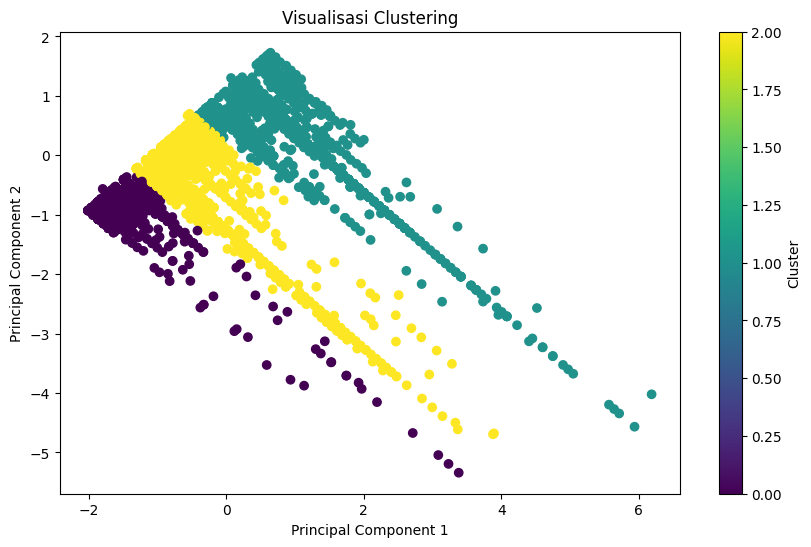

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Visualisasi Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [35]:
#Type your code here
# Melihat jumlah data di setiap cluster
cluster_distribution = data['Cluster'].value_counts()
print(cluster_distribution)


Cluster
1    2402
2    1777
0     629
Name: count, dtype: int64


In [36]:
# Melihat statistik deskriptif untuk setiap cluster
cluster_stats = data.groupby('Cluster').mean()  # Rata-rata per cluster
print(cluster_stats)


         release_year     country
Cluster                          
0         2014.467409   62.834658
1         2012.383014  430.803497
2         2012.530670  207.307822


In [37]:
# Statistik deskriptif per cluster
cluster_descriptive_stats = data.groupby('Cluster').describe()
print(cluster_descriptive_stats)


        release_year                                                         \
               count         mean       std     min     25%     50%     75%   
Cluster                                                                       
0              629.0  2014.467409  8.386616  1954.0  2015.0  2017.0  2018.0   
1             2402.0  2012.383014  9.730642  1942.0  2011.0  2016.0  2018.0   
2             1777.0  2012.530670  9.551737  1955.0  2011.0  2016.0  2018.0   

                country                                                     \
            max   count        mean        std    min    25%    50%    75%   
Cluster                                                                      
0        2021.0   629.0   62.834658  37.428165    0.0   35.0   60.0  100.0   
1        2021.0  2402.0  430.803497  36.147260  320.0  440.0  440.0  440.0   
2        2021.0  1777.0  207.307822  49.951974  136.0  173.0  173.0  239.0   

                
           max  
Cluster         
0    

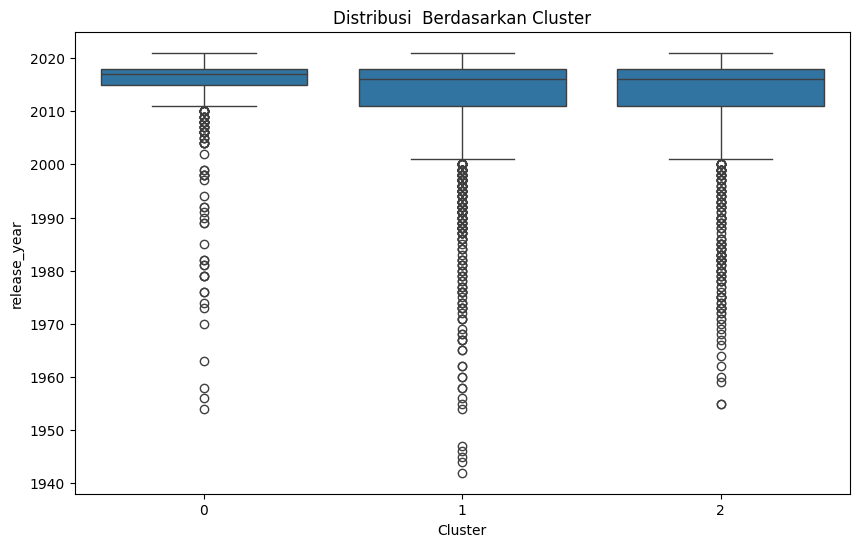

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi fitur berdasarkan cluster menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='release_year', data=data)  # Misalnya, distribusi usia berdasarkan cluster
plt.title('Distribusi  Berdasarkan Cluster')
plt.show()


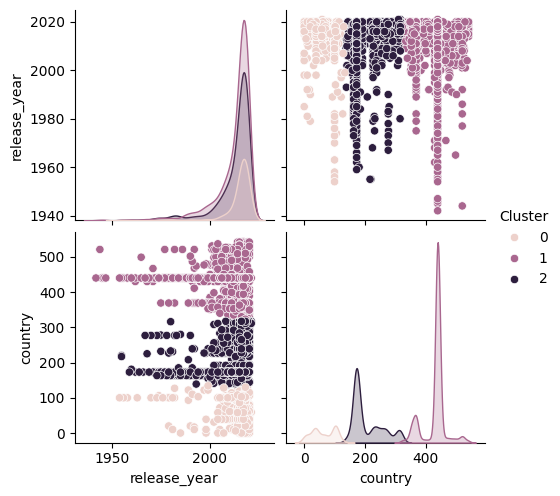

In [39]:
# Visualisasi pasangan fitur dalam cluster
sns.pairplot(data, hue='Cluster', vars=['release_year', 'country'])  # Misalnya, untuk beberapa fitur
plt.show()


##Hasil Clustering
Dari hasil clustering yang telah dilakukan pada data, kita dapat mengamati perbedaan distribusi antara tiga kelompok (cluster) dalam variabel release_year dan country. Berikut adalah penjelasan terperinci mengenai distribusi data dalam setiap cluster serta wawasan yang dapat diambil dari hasil clustering ini:

Distribusi Data dalam Setiap Cluster
## Cluster 0:
* Release Year:
Jumlah data: 629
Rata-rata tahun rilis: 2014,47, dengan standar deviasi 8,39, menunjukkan bahwa sebagian besar konten dalam cluster ini dirilis sekitar tahun 2014 hingga 2017.
50% dari data berada di rentang 2015 hingga 2018, dengan minimum tahun 1954 dan maksimum tahun 2021.
* Country: Jumlah data: 629
Rata-rata nilai encoding negara: 62,83 dengan standar deviasi 37,43, menunjukkan distribusi yang relatif lebar.
Nilai median encoding negara adalah 60, dengan rentang nilai encoding dari 0 hingga 135, yang mencakup berbagai negara yang mungkin memiliki representasi yang bervariasi.
## Cluster 1:

* Release Year:
Jumlah data: 2402
Rata-rata tahun rilis: 2012,38, dengan standar deviasi 9,73. Hal ini menunjukkan rentang tahun yang sedikit lebih lama dibandingkan dengan Cluster 0.
50% dari data berada di rentang tahun 2011 hingga 2018, dengan data tertua dari tahun 1942 dan terbaru hingga 2021.
* Country:
Jumlah data: 2402
Rata-rata nilai encoding negara: 430,80 dengan standar deviasi 36,15.
Median encoding negara adalah 440, dengan rentang encoding yang lebih sempit dari 320 hingga 543. Ini mungkin mengindikasikan bahwa negara-negara di dalam cluster ini lebih homogen, dengan dominasi negara tertentu dalam encoding yang lebih tinggi.
## Cluster 2:

* Release Year:
Jumlah data: 1777
Rata-rata tahun rilis: 2012,53, dengan standar deviasi 9,55. Distribusi tahun mirip dengan Cluster 1, dengan konten yang sebagian besar dirilis antara tahun 2011 dan 2018.
Data tertua berasal dari tahun 1955, dan yang terbaru dari tahun 2021.
* Country:
Jumlah data: 1777
Rata-rata nilai encoding negara: 207,31 dengan standar deviasi 49,95, menunjukkan distribusi yang lebih lebar dari Cluster 1 tetapi lebih sempit dibanding Cluster 0.
Median encoding negara adalah 173, dengan nilai encoding berkisar dari 136 hingga 319. Ini menunjukkan bahwa cluster ini memiliki distribusi geografis yang lebih tersebar, tetapi tidak seluas Cluster 0.
## Wawasan dari Hasil Clustering
* Perbedaan Temporal (Release Year):<br>
* Cluster 0 berisi data yang lebih baru dibandingkan dengan Cluster 1 dan Cluster 2, yang terlihat dari median tahun rilis yang sedikit lebih tinggi (2017) dibandingkan dengan dua cluster lainnya (2016).
Cluster 1 dan Cluster 2 memiliki rentang tahun yang lebih luas dengan rata-rata sekitar 2012, menandakan variasi yang lebih tinggi dalam periode konten yang dirilis.
Distribusi Geografis (Country):

* Cluster 1 cenderung memiliki encoding negara yang lebih tinggi, dengan nilai encoding berkisar antara 320 hingga 543. Hal ini dapat menunjukkan bahwa negara-negara dalam Cluster 1 memiliki representasi yang dominan, mungkin terkait dengan negara-negara dengan produksi konten yang lebih tinggi.
Cluster 0 dan Cluster 2 memiliki rentang encoding yang lebih rendah, yang menunjukkan variasi distribusi yang lebih luas dalam hal negara asal. Cluster 0 memiliki penyebaran yang sangat lebar, sementara Cluster 2 relatif lebih sempit tetapi masih lebih tersebar dibanding Cluster 1.
Insight untuk Analisis Lanjut:

* Segmentasi Konten: Clustering ini dapat membantu memahami segmentasi konten berdasarkan waktu rilis dan asal negara. Misalnya, konten baru dengan distribusi negara yang beragam mungkin mendominasi Cluster 0, sedangkan Cluster 1 mungkin lebih didominasi oleh negara-negara tertentu.
Pemetaan Konten Berdasarkan Asal Negara: Analisis ini dapat menginspirasi pemetaan konten berdasarkan popularitas di negara tertentu atau perubahan tren dalam rilis konten di negara-negara tertentu, terutama jika Cluster 1 menunjukkan konsistensi dalam negara dengan nilai encoding tinggi.
Strategi Kurasi Konten: Informasi ini berguna bagi tim kurasi konten untuk memutuskan strategi berdasarkan negara atau popularitas konten yang dirilis dalam periode tertentu, misalnya untuk konten yang berasal dari negara dalam Cluster 1 yang memiliki penyebaran encoding lebih sempit.
Wawasan ini dapat digunakan untuk menyusun rekomendasi yang relevan dalam pengembangan konten atau analisis lebih lanjut terhadap distribusi geografis dan temporal dari data ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [40]:
path ='/content/drive/My Drive/machine learning doing/netflix_cluster_titles.csv'
df = pd.read_csv(path)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   release_year  4808 non-null   int64
 1   country       4808 non-null   int64
 2   Cluster       4808 non-null   int64
dtypes: int64(3)
memory usage: 112.8 KB
